In [206]:
import os
import pandas as pd

def get_csv_filenames_with_min_rows(directory, min_rows,max_rows):
    csv_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                # Read the CSV file with pandas
                df = pd.read_csv(file_path)
                # Check if the number of rows is greater than or equal to the minimum specified
                if (len(df) >= min_rows) and (len(df)<=max_rows):
                    csv_files.append(filename)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")
    return csv_files

# Directory containing CSV files
directory_path = 'animation-songwen-final'
# Minimum number of rows required
min_rows = 194
max_rows = 1000
csv_files_with_min_rows = get_csv_filenames_with_min_rows(directory_path, min_rows,max_rows)
print("CSV files with 194 or more rows:")
print(len(csv_files_with_min_rows))
# for csv in csv_files_with_min_rows:
#     print(csv)


CSV files with 194 or more rows:
190


In [207]:
success_list=[]
time_list=[]
bot_list=[]
cbot_list=[]
for csv in csv_files_with_min_rows:
	temp=pd.read_csv('animation-songwen-final/'+csv)
	newtemp=temp[temp['trial_type']=='survey-text']
	if temp.iloc[-1]['time_elapsed']<550*1000 and csv!='798.csv' and csv!='781.csv' and csv!='686.csv':
		bot_list.append(list(newtemp['response'])[0][7:-2])
		cbot_list.append(csv)
	else:
		success_list.append(list(newtemp['response'])[0])
		time_list.append(temp.iloc[-1]['time_elapsed'])
len(list(set(success_list)))
cbot_list

['741.csv', '721.csv']

(array([ 3.,  3.,  5.,  2., 16., 21., 19., 11., 15., 10., 11.,  9., 10.,
         8.,  5.,  4.,  5.,  2.,  0.,  1.,  1.,  2.,  3.,  4.,  1.,  1.,
         1.,  2.,  3.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 481.192 ,  546.4071,  611.6222,  676.8373,  742.0524,  807.2675,
         872.4826,  937.6977, 1002.9128, 1068.1279, 1133.343 , 1198.5581,
        1263.7732, 1328.9883, 1394.2034, 1459.4185, 1524.6336, 1589.8487,
        1655.0638, 1720.2789, 1785.494 , 1850.7091, 1915.9242, 1981.1393,
        2046.3544, 2111.5695, 2176.7846, 2241.9997, 2307.2148, 2372.4299,
        2437.645 , 2502.8601, 2568.0752, 2633.2903, 2698.5054, 2763.7205,
        2828.9356, 2894.1507, 2959.3658, 3024.5809, 3089.796 , 3155.0111,
        3220.2262, 3285.4413, 3350.6564, 3415.8715, 3481.0866, 3546.3017,
        3611.5168, 3676.7319, 3741.947 ]),
 <BarContainer object of 50 artists>)

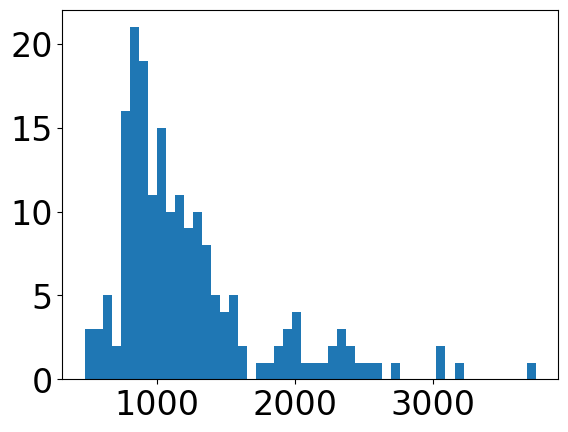

In [208]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(np.array(time_list)*0.001,bins=50)

305.csv: 5f4520ebb012170878012efc # this person try again
390.csv: 6032a88a2b8e882a37cc2766 # this person not

In [209]:
print('{"Q0":"5f4520ebb012170878012efc"}' in success_list)
print('{"Q0":"6032a88a2b8e882a37cc2766"}' in success_list)


True
False


In [210]:
success_list.append('{"Q0":"6032a88a2b8e882a37cc2766"}')

In [211]:
merge_data=pd.read_csv('animation-songwen-final.csv')
merge_data.head(5)

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,...,item_height_mm,item_width_px,px2mm,scale_factor,correct,question_order,init_locations,moves,final_locations,accuracy
0,10912.0,"<p>Due to compatibility issues, please <b>do n...",0,html-button-response,0,10930,0.0-0.0,123,1,2024-02-29 04:45:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,browser-check,1,11944,0.0-1.0,123,1,2024-02-29 04:45:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,browser-check,2,22930,0.0-2.0,123,1,2024-02-29 04:45:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16327.0,"<p>Due to compatibility issues, please <b>do n...",0,html-button-response,0,16336,0.0-0.0,120,1,2024-02-29 04:45:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,browser-check,1,17321,0.0-1.0,120,1,2024-02-29 04:45:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
prolific=merge_data[merge_data['trial_type']=='survey-text']
prolific.head()

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,...,item_height_mm,item_width_px,px2mm,scale_factor,correct,question_order,init_locations,moves,final_locations,accuracy
393,8436.0,NaN,"{""Q0"":""65ab04a12a188d698a4df098""}",survey-text,6,87433,0.0-6.0,103,1,2024-02-29 04:44:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,36437.0,NaN,"{""Q0"":""650c46a95d672d7602328705""}",survey-text,6,76385,0.0-6.0,11,1,2024-02-29 02:28:17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,10447.0,NaN,"{""Q0"":""614f70b55373b6760cb9d5c9""}",survey-text,6,161485,0.0-6.0,100,1,2024-02-29 04:44:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,7302.0,NaN,"{""Q0"":""613b45335ef9d60c2f15bb86""}",survey-text,6,172985,0.0-6.0,104,1,2024-02-29 04:44:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187,13183.0,NaN,"{""Q0"":""65a9b49e86480523ab92490f""}",survey-text,6,185829,0.0-6.0,117,1,2024-02-29 04:45:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
len(prolific.response.tolist())

209

In [214]:
all_people=list(set(prolific.response.tolist()))
print(len(all_people))
# fail_list=[]
for people in all_people:
    if people not in success_list:
        print(people)
print(len(success_list))

195
{"Q0":"5a520774eedc3200014206b4"}
{"Q0":"65257c1a7780ceee7f6ef9bd"}
{"Q0":"65959b14d677879036710db0"}
{"Q0":"60fd125837662fc5b446b2b8"}
{"Q0":"653771af284db9d1d335af93"}
{"Q0":"63bf40687b33e43442effb9b"}
{"Q0":"59b94b6211212f0001cd118a"}
189


Among 189 collected runs, 183 of them are valid. 1 of them are almost valid, missing the ranking and demographics.

6032a88a2b8e882a37cc2766 finish almost everything. Let's fund this person.

The following 5 ID didn't finish:
65257c1a7780ceee7f6ef9bd;
59b94b6211212f0001cd118a;
5a520774eedc3200014206b4;
65959b14d677879036710db0;
60fd125837662fc5b446b2b8;

In [215]:
longify={'b':'Blue','p':'Purple','g':'Green','y':'Yellow'}

In [216]:
def average_values(input_dict):
    output_dict = {}
    for key, values in input_dict.items():
        averaged_values = []
        for i in range(0, len(values), 9):
            chunk = values[i:i + 9]
            averaged_chunk = sum(chunk) / len(chunk)
            averaged_values.append(averaged_chunk)
        output_dict[key] = averaged_values
    return output_dict

In [217]:
from tqdm import tqdm
import re
import json
from collections import defaultdict

avg_list_dict=defaultdict(list)
var_list_dict=defaultdict(list)
spk_list_dict=defaultdict(list)

for csv in tqdm(csv_files_with_min_rows):
	temp=pd.read_csv('animation-songwen-final/'+csv)
	if temp[temp['trial_type']=='survey-text']['response'].tolist()[0] in success_list:
		response=temp[temp['trial_type'] =='survey-multi-choice'] 
		question=temp[temp['trial_type']=='video-button-response']
		avg_dict=defaultdict(int)
		var_dict=defaultdict(int)
		spk_dict=defaultdict(int)
		count_avg_dict=defaultdict(int)
		count_var_dict=defaultdict(int)
		count_spk_dict=defaultdict(int)
		rsp_i=0
		dir_list=[]
		for index, row in question.iterrows():
			visname=row['stimulus'][2:-2]
			dirname=re.sub(r'_(\d+)_', r'\1', visname.split('AVG',1)[0])
			dir_list.append(dirname)
			path= '../manim/' + dirname +'/videos/480p60/sections/Plot.json'
			with open (path, 'r') as f:
				answer_sheet=json.load(f)
			for ans in answer_sheet:
				if (ans['name']==visname):
					answer=ans['type']
					break
			#average
			avg_dict[dirname]+= int(re.findall(r'>(.*?)<\/font>',response.iloc[rsp_i*3]['response'])[0]==longify[answer[0]])
			count_avg_dict[dirname]+=1
			#variance
			var_dict[dirname]+= int(re.findall(r'>(.*?)<\/font>',response.iloc[rsp_i*3+1]['response'])[0]==longify[answer[1]])
			count_var_dict[dirname]+=1
			# #spike
			spk_dict[dirname]+= int(re.findall(r'>(.*?)<\/font>',response.iloc[rsp_i*3+2]['response'])[0]==longify[answer[2]])
			count_spk_dict[dirname]+=1
			rsp_i+=1
		for dirname in list(set(dir_list)):
			avg_list_dict[dirname].append(avg_dict[dirname]/count_avg_dict[dirname])
			var_list_dict[dirname].append(var_dict[dirname]/count_avg_dict[dirname])
			spk_list_dict[dirname].append(spk_dict[dirname]/count_avg_dict[dirname])


100%|██████████| 190/190 [00:03<00:00, 51.89it/s]


In [218]:
# avg_list_dict=average_values(avg_list_dict)
# var_list_dict=average_values(var_list_dict)
# spk_list_dict=average_values(spk_list_dict)

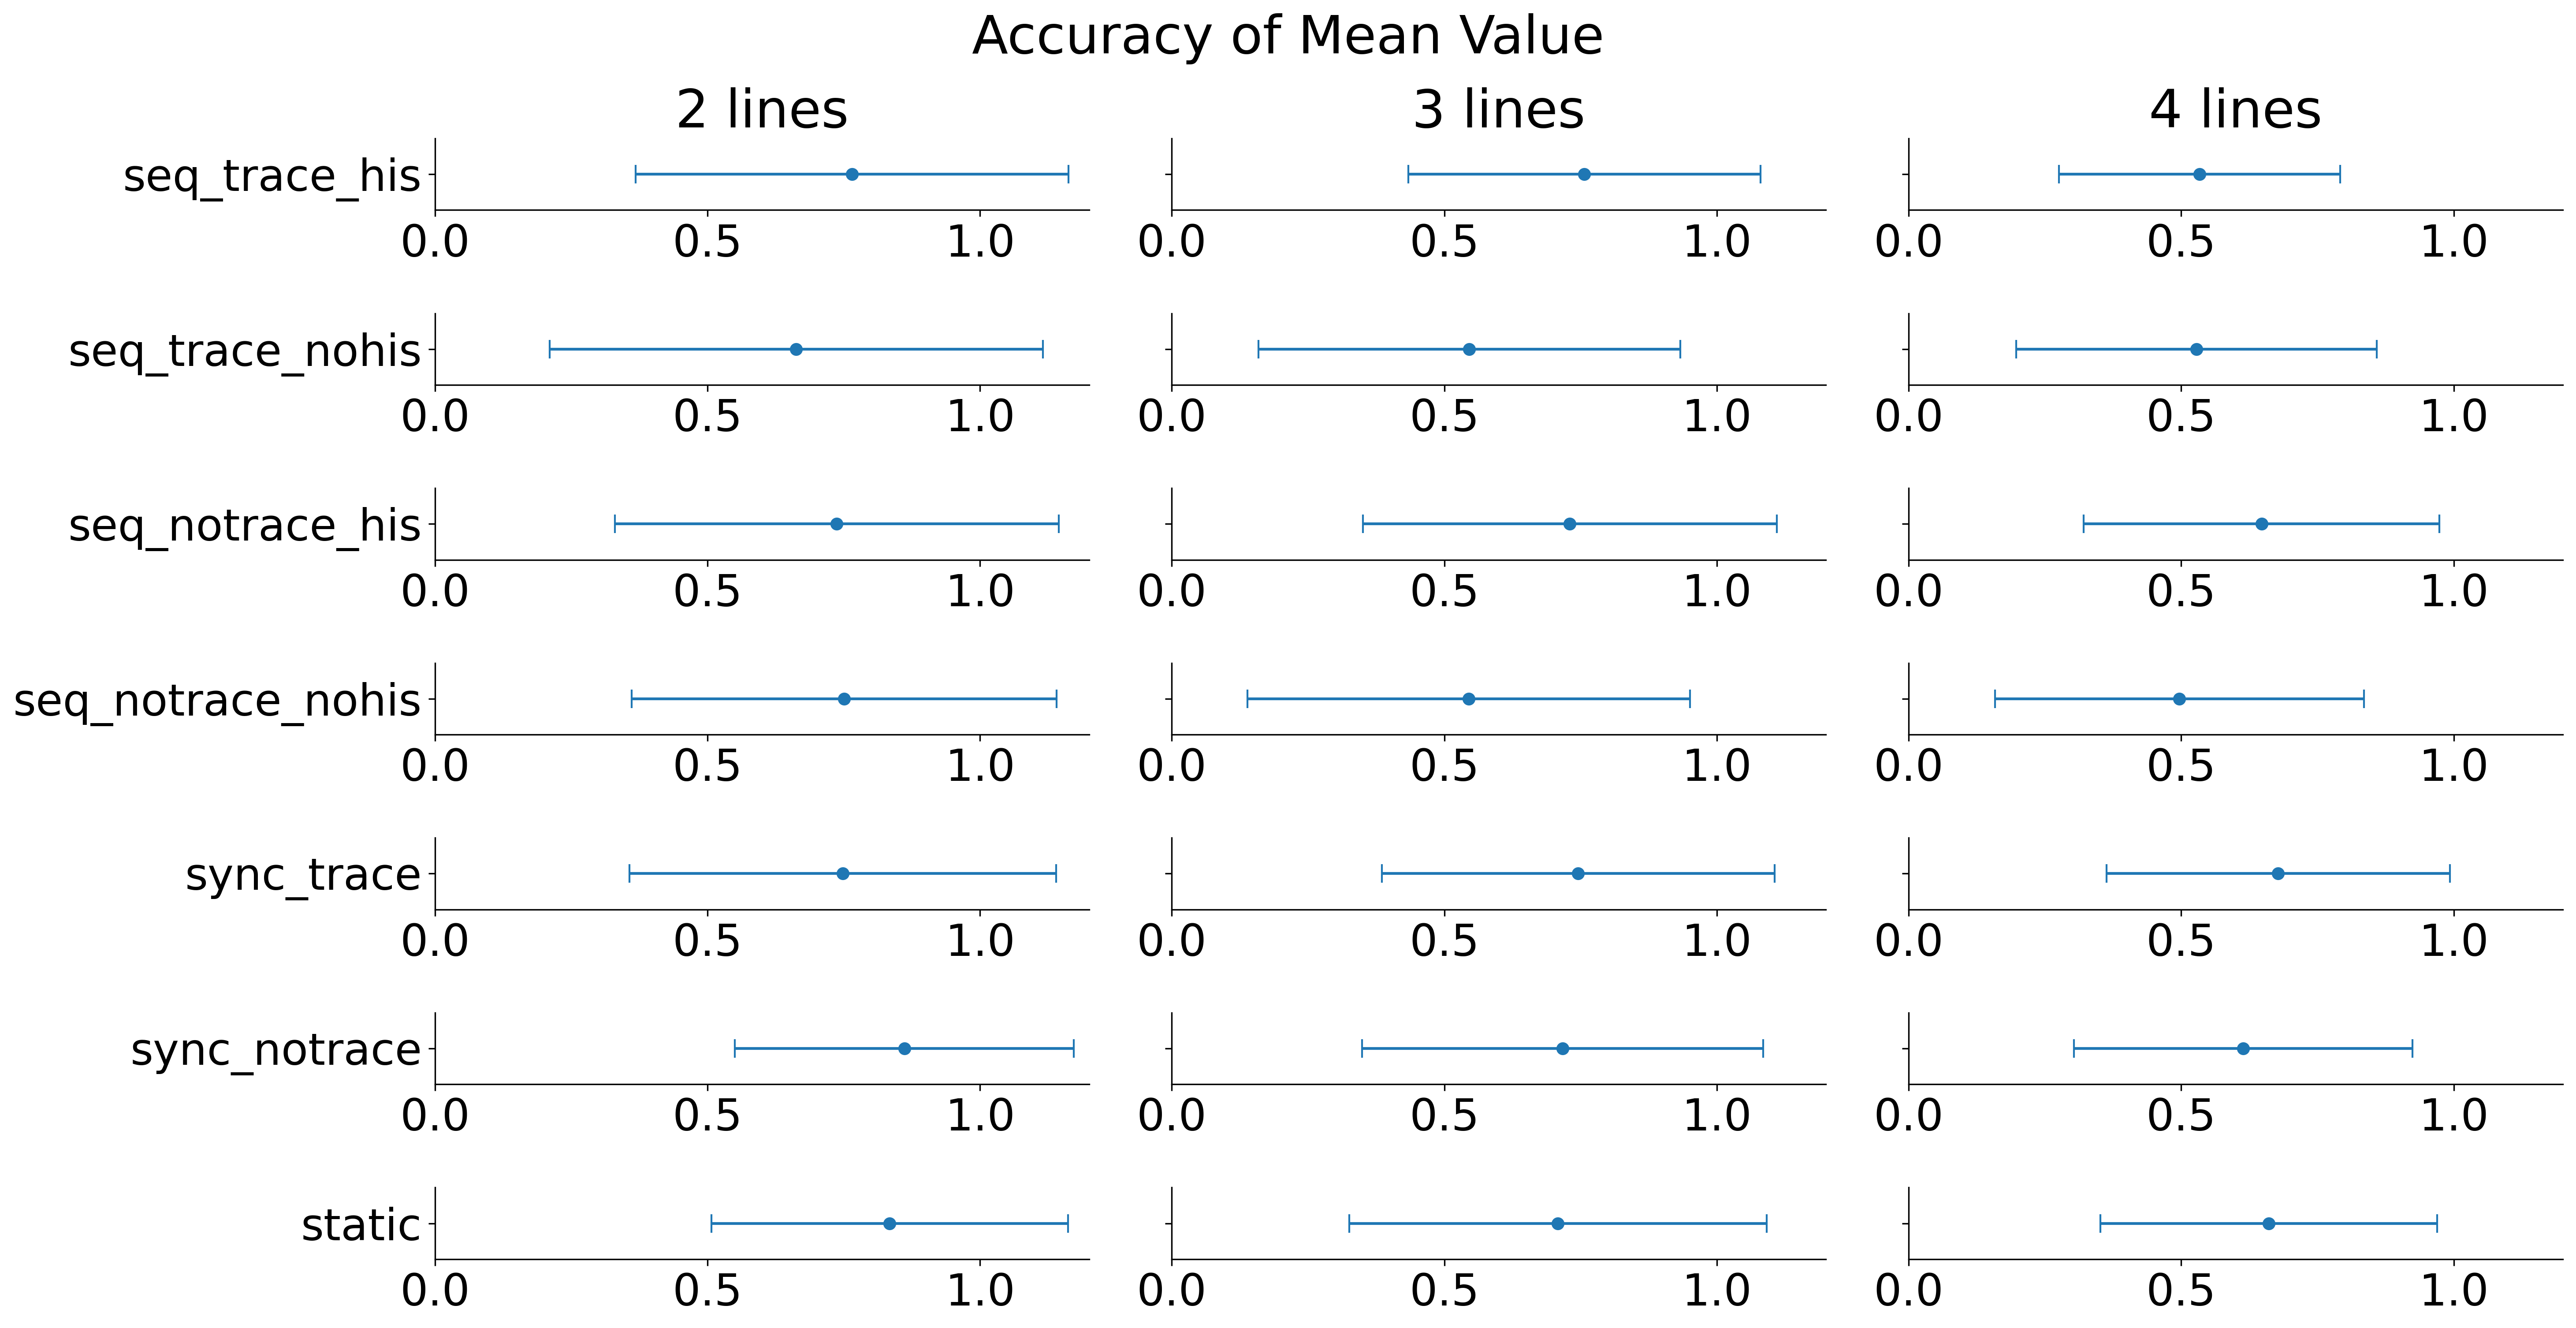

In [232]:
fig, axarray = plt.subplots(7, 3, figsize=[20, 10], dpi=300)
plt.rcParams.update({'font.size': 24})
namelist=[['seq_trace_his2','seq_trace_nohis2','seq_notrace_his2','seq_notrace_nohis2','sync_trace2','sync_notrace2','static2'],
		  ['seq_trace_his3','seq_trace_nohis3','seq_notrace_his3','seq_notrace_nohis3','sync_trace3','sync_notrace3','static3'],
		  ['seq_trace_his4','seq_trace_nohis4','seq_notrace_his4','seq_notrace_nohis4','sync_trace4','sync_notrace4','static4']]
# Loop through each subplot
for j, col_name in enumerate(['2 lines', '3 lines', '4 lines']):
    for i in range(7):
        # Calculate mean and standard deviation for error bars
        data = avg_list_dict[namelist[j][i]]
        mean = np.mean(data)
        std_dev = np.std(data)
        
        # Plot dot with error bars
        axarray[i, j].errorbar(mean, i, xerr=std_dev, fmt='o', capsize=5)
        
        # Customizing y-axis labels
        axarray[i, j].set_yticks([i]) 
        if j == 0:
            axarray[i, j].set_yticklabels([namelist[j][i][:-1]])
        else:
            axarray[i, j].set_yticklabels([''])
        
        # Hide the right and top spines
        axarray[i, j].spines['right'].set_visible(False)
        axarray[i, j].spines['top'].set_visible(False)
        # Set x-axis limit to 0 to 1.1
        axarray[i, j].set_xlim(0, 1.2)
    
    # Add column name
    axarray[0, j].set_title(col_name)

# Adjusting layout
plt.tight_layout()

# Adding a title
fig.suptitle('Accuracy of Mean Value', y=1.02)

# Show the plot
plt.show()

In [220]:
sort=merge_data[merge_data['trial_type']=='free-sort']
sort['final_locations'].tolist()[0]

def rank_src_by_x(input_string):
    # Parse the input string as JSON
    data = json.loads(input_string)
    
    # Sort the data based on the 'x' values
    sorted_data = sorted(data, key=lambda x: x['x'], reverse=True)
    
    # Create a dictionary to store the ranking
    ranking = {}
    
    # Assign ranks from 1 to 7 to the sorted 'src' values
    for i, item in enumerate(sorted_data):
        src = item['src']
        ranking[src] = i + 1
    
    return ranking

# Example usage
input_string = '[{"src":"seq_trace_his.gif","x":533,"y":37},{"src":"seq_notrace_his.gif","x":145,"y":27},{"src":"seq_notrace_nohis.gif","x":205,"y":24},{"src":"seq_trace_nohis.gif","x":299,"y":50},{"src":"sync_trace.gif","x":1078,"y":52},{"src":"sync_notrace.gif","x":73,"y":43},{"src":"static.png","x":1176,"y":38}]'

output_dict = rank_src_by_x(input_string)
print(output_dict)

sort_list_dict=defaultdict(list)
for csv in tqdm(csv_files_with_min_rows):
	temp=pd.read_csv('animation-songwen-final/'+csv)
	if temp[temp['trial_type']=='survey-text']['response'].tolist()[0] in success_list:
		try:
			sort_string=temp[temp['trial_type'] =='free-sort']['final_locations'].tolist()[0]
			sort_dict=rank_src_by_x(sort_string)
			for key, value in sort_dict.items():
				sort_list_dict[key].append(value)
		except:
			print('error')

# dict(sort_list_dict)

{'static.png': 1, 'sync_trace.gif': 2, 'seq_trace_his.gif': 3, 'seq_trace_nohis.gif': 4, 'seq_notrace_nohis.gif': 5, 'seq_notrace_his.gif': 6, 'sync_notrace.gif': 7}


 35%|███▌      | 67/190 [00:00<00:00, 662.84it/s]

error


100%|██████████| 190/190 [00:00<00:00, 729.60it/s]


In [221]:
catlist=[]
rank_avg_list=[]
rank_err_list=[]
for cat, ranklist in dict(sort_list_dict).items():
	print(cat,np.mean(ranklist),np.std(ranklist))
	catlist.append(cat[:-4])
	rank_avg_list.append(np.mean(ranklist))
	rank_err_list.append(np.std(ranklist))
# catlist

sync_trace.gif 3.0427807486631018 1.7697060906026223
static.png 2.7967914438502675 1.8503910193304471
seq_notrace_nohis.gif 5.2994652406417115 1.955699126226015
seq_trace_his.gif 3.3315508021390374 1.6570120816889036
seq_notrace_his.gif 3.8823529411764706 1.5708095339696873
seq_trace_nohis.gif 4.342245989304812 1.715135916543215
sync_notrace.gif 5.304812834224599 1.7696576128091135


In [222]:
plt.figure(dpi=300)
# Data
x_values = [1, 2, 3, 4, 5,6,7]  # x-axis values
y_values = rank_avg_list  # y-axis values
error_values = rank_err_list   # error values

# Plotting with error bars
plt.bar(x_values, y_values, yerr=error_values, capsize=5, color='skyblue', edgecolor='black', linewidth=1.5)

# Customizing the plot
plt.title('Ranking of Different Animation Designs', fontsize=16)  # Title of the plot
# plt.xlabel('X-axis Label', fontsize=14)  # Label for the x-axis
plt.ylabel('Ranking', fontsize=14)  # Label for the y-axis
plt.xticks(x_values, catlist, rotation=90, fontsize=12)  # Customizing x-axis tick labels
plt.yticks(fontsize=12)  # Customizing y-axis tick labels
plt.grid(True, linestyle='--', alpha=0.7)  # Showing grid lines with a dashed style and reduced opacity
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Displaying the plot
plt.savefig('rank.pdf')
plt.close()